## **Vertexai Init**

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [2]:
PROJECT_ID = "gen-lang-client-0341374211"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

if "google.colab" in sys.modules:
    # Define project information
    PROJECT_ID = PROJECT_ID
    LOCATION = LOCATION

    # Initialize Vertex AI
    import vertexai
    vertexai.init(project=PROJECT_ID, location=LOCATION)

In [3]:
search_query = """Sea food near Googleplex
1600 Amphitheatre Parkway
Mountain View, CA 94043
United States"""
#'how to make a great pastrami sandwich'

## **Quick Function Test**

In [4]:
!pip install requests html2text beautifulsoup4

In [5]:
import requests
from bs4 import BeautifulSoup
import html2text

def scrape_website(url):
    try:
        # Send an HTTP request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            return html2text.html2text(response.text)

        else:
            print(f"Failed to retrieve content. Status code: {response.status_code}")

    except Exception as e:
        print(f"An error occurred: {e}")

https://www.google.com/search?q=Sea food near Googleplex
1600 Amphitheatre Parkway
Mountain View, CA 94043
United States


'[Google](/?sa=X&ved=0ahUKEwjLx9qe7J-DAxXPRzABHaDGA-0QOwgC)\n\n×\n\nPlease click\n[here](/search?q=Sea+food+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=3678b59fd9e83b1f&ie=UTF-8&gbv=1&sei=n9ODZYv8Bs-\nPwbkPoI2P6A4) if you are not redirected within a few seconds.\n\nAll[Maps](/url?q=https://maps.google.com/maps%3Fq%3DSeafood%2Bnear%2BGoogleplex%250A1600%2BAmphitheatre%2BParkway%250AMountain%2BView,%2BCA%2B94043%250AUnited%2BStates%26um%3D1%26ie%3DUTF-8&opi=89978449&sa=U&ved=0ahUKEwjLx9qe7J-DAxXPRzABHaDGA-0QiaAMCAYoAQ&usg=AOvVaw1w1Gh-\nsAY_8tIaxZlezla5)[Videos](/search?q=Seafood+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=3678b59fd9e83b1f&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjLx9qe7J-DAxXPRzABHaDGA-0Q_AUIBygC)[Books](/search?q=Seafood+near+Googleplex%0A1600+Amphitheatre+Parkway%0AMountain+View,+CA+94043%0AUnited+States&sca_esv=3678b59fd9e83b1f&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=
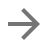

In [6]:
url = f'https://www.google.com/search?q={search_query}'
print(url)
google_search_content = scrape_website(url)
google_search_content

In [7]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part

def google_search_formated_response(content, max_output_tokens=7815):
  model = GenerativeModel("gemini-pro")

  schema = """
  {
    "places": [
      {
        "name": "",
        "rating": <<float>>,
        "price": "",
        "category": "",
        "address": "",
        "city": "",
        "state": "",
        "zip": "",
        "country": "",
        "phone": "",
        "website": ""
      }
    ]
  }
  """

  responses = model.generate_content(
    f"""Format the below response to the following JSON schema.

    Here's the content:

    {content}

    """,
        generation_config={
            "max_output_tokens": max_output_tokens,
            "temperature": 0,
            "top_p": 1
        },
      stream=True,
      )

  formated_response = []

  for response in responses:
      text = response.candidates[0].content.parts[0].text
      print(text)
      formated_response.append(text)

  return formated_response

formated_response = google_search_formated_response(google_search_content)

```json
{
  "places": [
    {
      "
name": "Pacific Catch",
      "rating": "4.3",

      "price": "$$",
      "category": "Seafood",
      "address": "545 San Antonio Rd Suite 34
",
      "hours": "Closed \u00b7 Opens 11 AM Thu",
      "description": "Pan-Pacific seafood eatery
 with a patio",
      "url": "/search?sca_esv=3678b59fd9e83b1f&ie=UTF-8&q=Pacific+Catch+Mountain+View
,+CA&ludocid=11530031354653019358&lsig=AB86z5UKA1Qyk_IMl_EuNnvNi
3K3&phdesc=e44nj9qSoZw&sa=X&ved=2ahUKEwjLx9qe7J-DAxXPRzABHaDGA-0QvS56BAgLEAQ"
    },
    {
      "name":
 "The Cookout Food Truck",
      "rating": "4.5",
      "price": "$",
      "category": "Fish & Chips",
      "address": "2534 Old Middlefield Way",
      "hours": "Closed \u00b7 Opens 
6 PM Thu",
      "description": null,
      "url": "/search?sca_esv=3678b59fd9e83b1f&ie=UTF-8&q=The+Cookout+Food+Truck+Mountain+View,+CA&lud
ocid=11552274259547282965&lsig=AB86z5UQOzQDDMzYlifmWMwL08IF&phdesc=0Fde7Ae7v8A&sa=X&
ved=2ahUKEwjLx9qe7J-DAxXPRzABHaDGA